In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [3]:
data = pd.read_csv("/content/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
from sklearn.preprocessing import normalize
data1_norm = pd.DataFrame(normalize(data),columns= data.columns)
data1_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.004018,0.018364,0.007568,0.003282,0.027459,0.127251,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991217
174,0.003961,0.017691,0.005162,0.003274,0.030366,0.134665,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990186
175,0.003554,0.015723,0.005071,0.002678,0.023697,0.142179,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989330
176,0.003534,0.015514,0.003051,0.002792,0.023559,0.141354,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989476


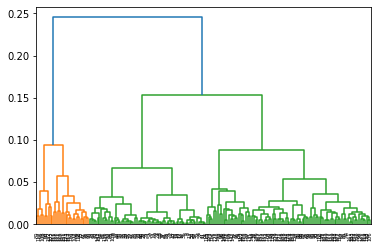

In [9]:
dendogram = sch.dendrogram(sch.linkage(data1_norm, method="complete"))

In [10]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [11]:
y_hc = hc.fit_predict(data1_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [12]:
y=pd.DataFrame(hc.fit_predict(data1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    97
2    45
1    36
Name: clustersid, dtype: int64

In [14]:
data['clustersid']=hc.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustersid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


**K Means Clustering ***

In [18]:
from sklearn.cluster import KMeans

In [19]:
data = pd.read_csv("/content/wine.csv")

In [20]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

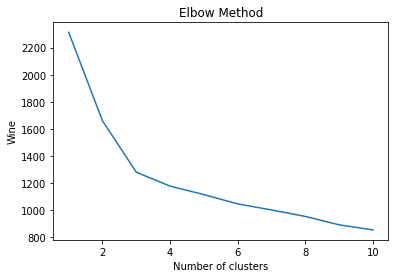

In [21]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wine')
plt.show()

In [22]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=30)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=30)

In [23]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2, 3, 3, 0, 0,
       3, 3, 2, 3, 2, 0, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 2, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 1, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [24]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [25]:
clusters_new.cluster_centers_

array([[-1.00945473, -0.17530974,  0.36287527,  0.72694362, -0.46965292,
        -0.11613824,  0.14076017,  0.4282407 ,  0.08695145, -0.91565293,
         0.38180484,  0.30055129, -0.80399616],
       [ 0.90537676, -0.29781954,  0.29338792, -0.69473572,  0.55724067,
         0.89427402,  0.95416129, -0.60903111,  0.59829118,  0.19364983,
         0.47074532,  0.77709639,  1.1783867 ],
       [ 0.15003219,  0.80270629,  0.16860134,  0.49557209, -0.05471788,
        -0.97140458, -1.20232198,  0.72850801, -0.79331858,  0.87420953,
        -1.11991541, -1.28290651, -0.38414264],
       [-0.8217734 , -0.65393968, -1.42982209, -0.4607061 , -0.43322645,
         0.11198317,  0.07423794, -0.67682984,  0.12294822, -0.82012977,
         0.60974853,  0.38301459, -0.66476435]])

In [26]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid_new
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


**PCA ***

In [27]:
from sklearn.preprocessing import scale 

In [28]:
data = pd.read_csv("/content/wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
data.values

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [33]:
# Normalizing the  numerical data
data_norm=scale(data)
data_norm

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [35]:
# PCA Implementation 
from sklearn.decomposition import PCA
pca = PCA()
pca_values = pca.fit_transform(data_norm)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [36]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [37]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [38]:
# Cummulative variance of each PCA
Var = np.cumsum(np.round(var,decimals= 4)*100)
Var

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

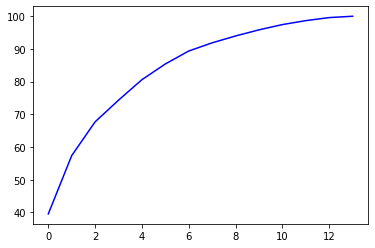

In [39]:
plt.plot(Var,color="blue");

In [41]:
# Final Dataframe
final_df=pd.concat([data['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

,Type,PC1,PC2,PC3
0,1,-3.522934,-1.453098,-0.164795
1,1,-2.528858,0.330019,-2.026707
2,1,-2.785029,-1.036936,0.983238
3,1,-3.922588,-2.768210,-0.174968
4,1,-1.407511,-0.867773,2.025829
...,...,...,...,...
173,3,3.627996,-2.206617,-0.343668
174,3,2.942729,-1.752263,0.207480
175,3,3.027272,-2.756040,-0.940803
176,3,2.755222,-2.293784,-0.550474


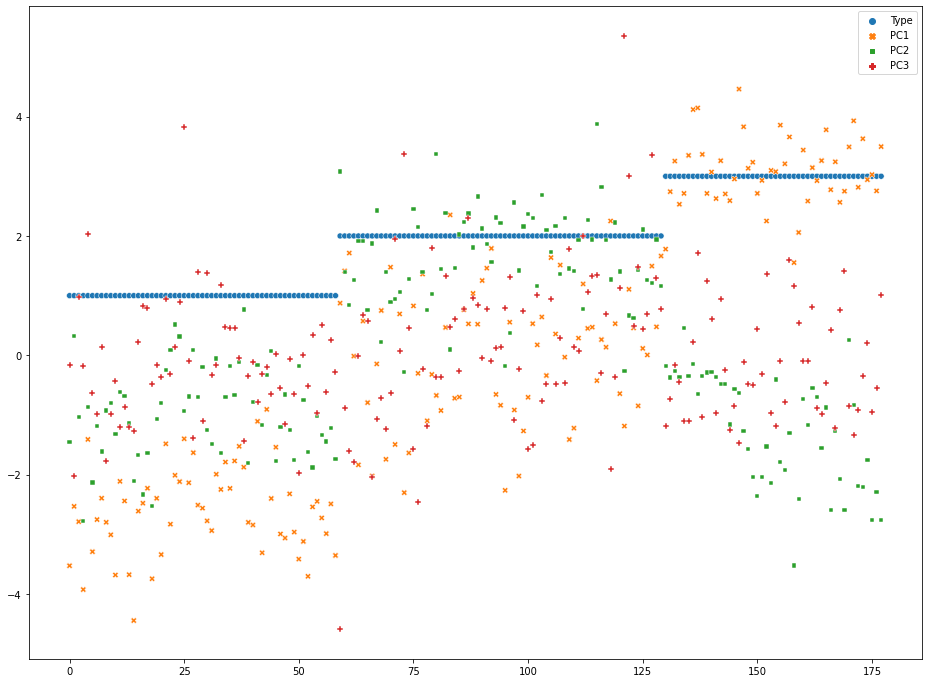

In [42]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df);

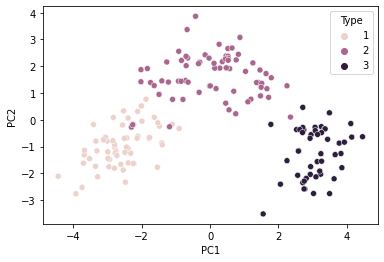

In [43]:
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type');

In [44]:
pca_values[: ,0:1]

array([[-3.5229339 ],
       [-2.52885806],
       [-2.78502898],
       [-3.92258841],
       [-1.40751111],
       [-3.28812981],
       [-2.75057754],
       [-2.39286652],
       [-2.79525633],
       [-3.00559666],
       [-3.67868855],
       [-2.10963477],
       [-2.43845636],
       [-3.67349453],
       [-4.44157575],
       [-2.60892387],
       [-2.47542846],
       [-2.22623243],
       [-3.74226929],
       [-2.3944115 ],
       [-3.33656895],
       [-1.48140399],
       [-2.82806867],
       [-2.00771405],
       [-2.11463604],
       [-1.39753751],
       [-2.13348803],
       [-1.62970383],
       [-2.50760753],
       [-2.55948318],
       [-2.77244452],
       [-2.93513374],
       [-1.99124842],
       [-2.24570987],
       [-1.78698628],
       [-2.22763867],
       [-1.76802847],
       [-1.52317798],
       [-1.87236494],
       [-2.79711434],
       [-2.84093569],
       [-1.1055721 ],
       [-3.30689482],
       [-0.90479842],
       [-2.39683569],
       [-1

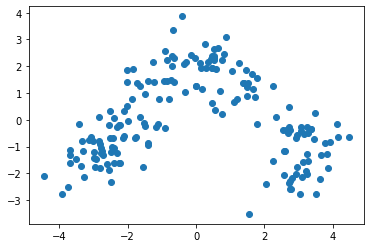

In [45]:
x= pca_values[:,0:1]
y= pca_values[:,1:2]
plt.scatter(x,y);